In [5]:
from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def animate_fast(folder, frames, width):
    fig = plt.figure(frameon=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    black = '#000000'
    purple = '#51087E'
    green = '#009b48'
    red = '#b71234'
    orange = '#ff5800'
    yellow = '#ffd500'
    white = '#ffffff'
    blue = '#0046ad'
    cmap1 = [black, black, purple, yellow, blue, orange, green, white, red]
    cmap = ListedColormap(cmap1)
    im = plt.axis('off')
    im = plt.matshow(frames[0], fignum=0, cmap=cmap)
    ratio = frames[0].shape[0] / frames[0].shape[1]
    fig.set_size_inches([width, width * ratio])

    def update_img(frame):
        im.set_data(frame)
        return im,
    my_anim = animation.FuncAnimation(fig, update_img, frames, blit=True)
    my_anim.save(f'{folder}.gif')
    return my_anim


MovieWriter ffmpeg unavailable; using Pillow instead.


13566


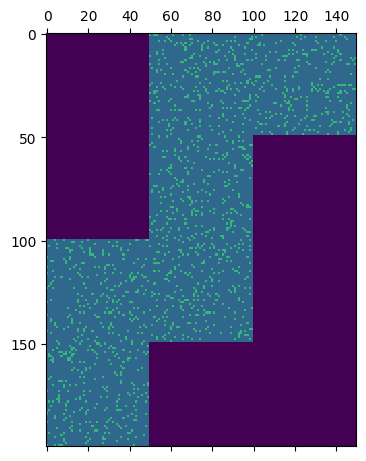

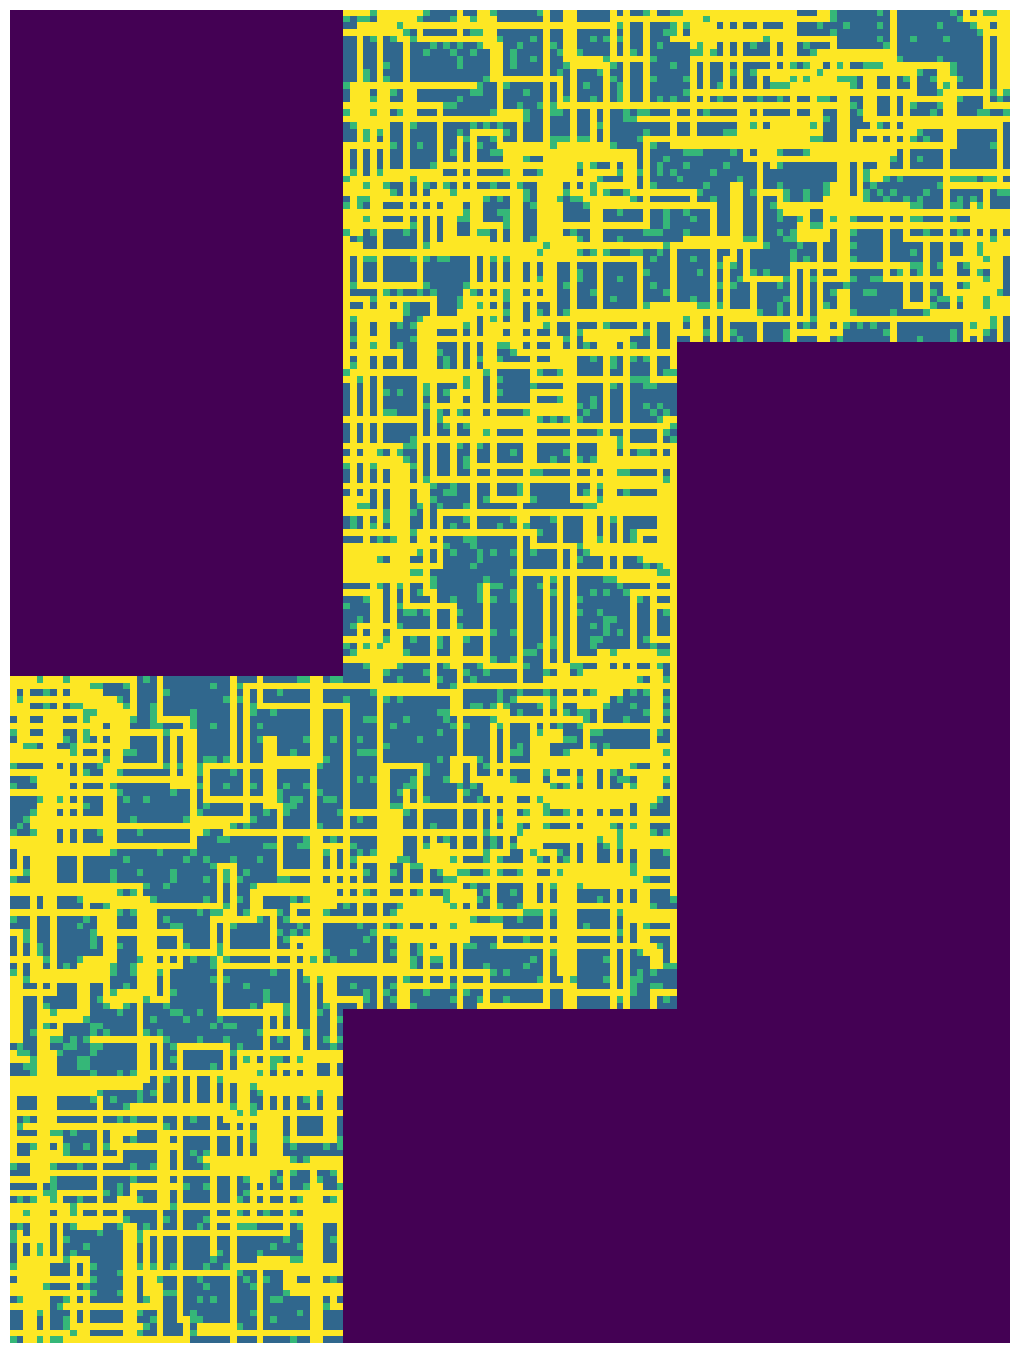

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import re 

with open('input.txt', 'r') as f:
    input = f.read()
input = input.splitlines()
directions = input.pop()
input.pop()
max_width = 0
for line in input:
    if(len(line) > max_width):
        max_width = len(line)

map = []
for line in input:
    line = line.ljust(max_width, ' ')
    line = [1 if x == '.' else 2 if x == '#' else 0 for x in line]
    map.append(line)
map = np.array(map)

position = (np.where(map[0] == 1)[0][0], 0)
map[position[1]][position[0]] = 3
plt.matshow(map)
directions = re.split(r"(R|L)", directions)
x_direction = 1
y_direction = 0
frames = []
frame_count = 0
for direction in directions:
    frame_count += 1
    if(frame_count % 8 == 0):
        frames.append(map.copy()) 
    if(direction == 'R' or direction == 'L'):
        if(direction == 'R'):
            x_direction, y_direction = -y_direction, x_direction
        else:
            x_direction, y_direction = y_direction, -x_direction
    else:
        for i in range(int(direction)):
            temp_position = (position[0] + x_direction, position[1] + y_direction)
            try:
                if(temp_position[0] >= map.shape[1] or (x_direction == 1 and map[temp_position[1]][temp_position[0]] == 0)):
                    wrap = np.where((map[temp_position[1]] != 0))[0][0]
                    temp_position = (wrap, temp_position[1])
                elif(temp_position[1] >= map.shape[0] or (y_direction == 1 and map[temp_position[1]][temp_position[0]] == 0)):
                    wrap = np.where(map[:, temp_position[0]] != 0)[0][0]
                    temp_position = (temp_position[0], wrap)
                elif(temp_position[0] < 0 or (x_direction == -1 and map[temp_position[1]][temp_position[0]] == 0)):
                    wrap = np.where(map[temp_position[1]] != 0)[0][-1]
                    temp_position = (wrap, temp_position[1])
                elif(temp_position[1] < 0 or (y_direction == -1 and map[temp_position[1]][temp_position[0]] == 0)):
                    wrap = np.where(map[:, temp_position[0]] != 0)[0][-1]
                    temp_position = (temp_position[0], wrap)
                if(map[temp_position[1]][temp_position[0]] == 2):
                    break
                position = temp_position
                map[position[1]][position[0]] = 3
            except:
                print(position, temp_position, map.shape)
                break

# print(position, x_direction, y_direction)
if(x_direction == 1):
    f_direction = 0
elif(y_direction == 1):
    f_direction = 1
elif(x_direction == -1):
    f_direction = 2
else:
    f_direction = 3
final_score = (position[1] + 1) * 1000 + (position[0] + 1) * 4 + f_direction

# print(position, x_direction, y_direction)
animate_fast('part_one', frames, 10)
print(final_score)


MovieWriter ffmpeg unavailable; using Pillow instead.


74267


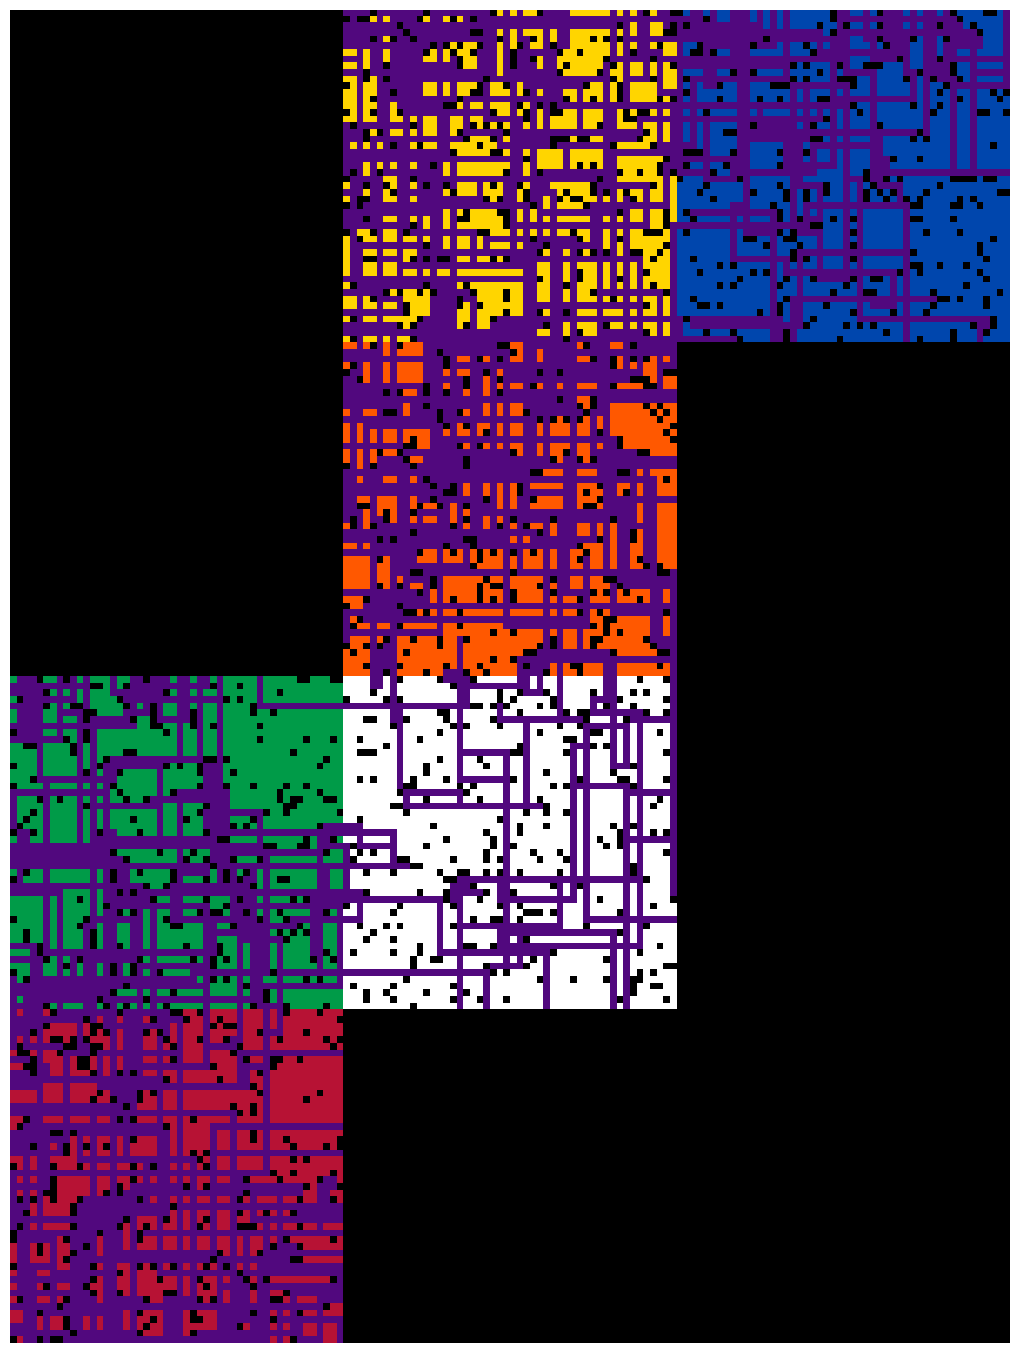

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import re

with open('input.txt', 'r') as f:
    input = f.read()
input = input.splitlines()
directions = input.pop()
input.pop()
max_width = 0
for line in input:
    if(len(line) > max_width):
        max_width = len(line)

map = []
for line in input:
    line = line.ljust(max_width, ' ')
    line = [3 if x == '.' else 1 if x == '#' else 0 for x in line]
    map.append(line)
map = np.array(map)

x_face_check = map.shape[0] // 4
y_face_check = map.shape[1] // 3
replace = 0
count = 0
position = (np.where(map[0] == 3)[0][0], 0)
# position = (100, 0)

for i, x in enumerate(map):
    for j, y in enumerate(x):
        replace = 0
        y_check = i // y_face_check
        x_check = j // x_face_check
        if(x_check == 0):
            if(y_check == 2):
                replace = 6
            elif(y_check == 3):
                replace = 8
        elif(x_check == 1):
            if(y_check == 0):
                replace = 3
            elif(y_check == 1):
                replace = 5
            elif(y_check == 2):
                replace = 7
        elif(x_check == 2):
            if(y_check == 0):
                replace = 4
        if(map[i][j] != 1 and map[i][j] != 0 and replace):
            map[i][j] = replace

current_face = map[position[1]][position[0]]
map[position[1]][position[0]] = 2
directions = re.split(r"(R|L)", directions)
x_direction = 1
y_direction = 0
frames = []
frame_count = 0
faceboundsX = {
    3: [50, 99],
    4: [100, 149],
    5: [50, 99],
    6: [0, 49],
    7: [50, 99],
    8: [0, 49]
}
faceboundsY = {
    3: [0, 49],
    4: [0, 49],
    5: [50, 99],
    6: [100, 149],
    7: [100, 149],
    8: [150, 199]
}
facemap = {
    3:{
        'U': (8, 'R', False),
        'L': (6, 'R', True)
    },
    4:{
        'D': (5, 'L', False),
        'R': (7, 'L', True),
        'U': (8, 'U', False)
    },
    5:{
        'R': (4, 'U', False),
        'L': (6, 'D', False)
    },
    6:{
        'U': (5, 'R', False),
        'L': (3, 'R', True)
    },
    7:{
        'R': (4, 'L', True),
        'D': (8, 'L', False)
    },
    8:{
        'R': (7, 'U', False),
        'D': (4, 'D', False),
        'L': (3, 'D', False)
    },
}
facecheck_copy = map.copy()
f_direction = 'R'
for direction in directions:
    frame_count += 1
    if(frame_count % 8 == 0):
        frames.append(map.copy()) 
    if(direction == 'R' or direction == 'L'):
        if(direction == 'R'):
            x_direction, y_direction = -y_direction, x_direction
        else:
            x_direction, y_direction = y_direction, -x_direction
        if(x_direction == 1):
            f_direction = 'R'
        elif(y_direction == 1):
            f_direction = 'D'
        elif(x_direction == -1):
            f_direction = 'L'
        else:
            f_direction = 'U'
    else:
        for i in range(int(direction)):
            temp_position = (position[0] + x_direction, position[1] + y_direction)        
            try:
                if(temp_position[0] >= map.shape[1] or (f_direction == 'R' and map[temp_position[1]][temp_position[0]] == 0)):
                    f_direction = face[1]
                    x_pos = position[0] - faceboundsX[current_face][0]
                    if face[2]:
                        y_pos = faceboundsY[current_face][1] - position[1]
                    else:
                        y_pos = position[1] - faceboundsY[current_face][0]
                    if(f_direction == 'L'):
                        wrapX = faceboundsX[face[0]][1]
                        wrapY = faceboundsY[face[0]][0] + y_pos
                    elif f_direction == 'U':
                        wrapX = faceboundsX[face[0]][0] + y_pos
                        wrapY = faceboundsY[face[0]][1]
                    temp_position = (wrapX, wrapY)
                elif(temp_position[1] >= map.shape[0] or (f_direction == 'D' and map[temp_position[1]][temp_position[0]] == 0)):
                    face = facemap[current_face][f_direction]
                    f_direction = face[1]
                    if face[2]:
                        x_pos = faceboundsX[current_face][1] - position[0]
                    else:
                        x_pos = position[0] - faceboundsX[current_face][0]
                    y_pos = position[1] - faceboundsY[current_face][0]
                    if f_direction == 'L':
                        wrapX = faceboundsX[face[0]][1]
                        wrapY = faceboundsY[face[0]][0] + x_pos
                    elif f_direction == 'D':
                        wrapX = faceboundsX[face[0]][0] + x_pos
                        wrapY = faceboundsY[face[0]][0]
                    temp_position = (wrapX, wrapY)
                elif(temp_position[0] < 0 or (f_direction == 'L' and map[temp_position[1]][temp_position[0]] == 0)):
                    face = facemap[current_face][f_direction]
                    f_direction = face[1]
                    x_pos = position[0] - faceboundsX[current_face][0]
                    if face[2]:
                        y_pos = faceboundsY[current_face][1] - position[1]
                    else:
                        y_pos = position[1] - faceboundsY[current_face][0]
                    if f_direction == 'D':
                        wrapX = faceboundsX[face[0]][0] + y_pos
                        wrapY = faceboundsY[face[0]][0]
                    elif f_direction == 'R':
                        wrapX = faceboundsX[face[0]][0]
                        wrapY = faceboundsY[face[0]][0] + y_pos
                    temp_position = (wrapX, wrapY)
                elif(temp_position[1] < 0 or (f_direction == 'U' and map[temp_position[1]][temp_position[0]] == 0)):
                    face = facemap[current_face][f_direction]
                    f_direction = face[1]
                    if face[2]:
                        x_pos = faceboundsX[current_face][1] - position[0]
                    else:
                        x_pos = position[0] - faceboundsX[current_face][0]
                    y_pos = position[1] - faceboundsY[current_face][0]
                    if f_direction == 'U':
                        wrapX = faceboundsX[face[0]][0] + x_pos
                        wrapY = faceboundsY[face[0]][1]
                    elif f_direction == 'R':
                        wrapX = faceboundsX[face[0]][0]
                        wrapY = faceboundsY[face[0]][0] + x_pos
                    temp_position = (wrapX, wrapY)
                if(map[temp_position[1]][temp_position[0]] == 1):
                    break
                if(f_direction == 'R'):
                    x_direction = 1
                    y_direction = 0
                elif(f_direction == 'D'):
                    x_direction = 0
                    y_direction = 1
                elif(f_direction == 'L'):
                    x_direction = -1
                    y_direction = 0
                else:
                    x_direction = 0
                    y_direction = -1
                position = temp_position
                if(facecheck_copy[position[1]][position[0]] in facemap.keys()):
                    current_face = facecheck_copy[position[1]][position[0]]
                map[position[1]][position[0]] = 2
                
            except Exception as e:
                print(e)
                # print(position, temp_position, map.shape, f_direction, face, x_pos, y_pos, wrapX, wrapY, current_face, faceboundsY)
                break

if(x_direction == 1):
    f_direction = 'R'
elif(y_direction == 1):
    f_direction = 'D'
elif(x_direction == -1):
    f_direction = 'L'
else:
    f_direction = 'U'
frames.append(map.copy())
directions = ['R', 'D', 'L', 'U']
final_score = (position[1] + 1) * 1000 + (position[0] + 1) * 4 + directions.index(f_direction)
animate_fast('part_two', frames, 10)
print(final_score)


MovieWriter ffmpeg unavailable; using Pillow instead.


5031


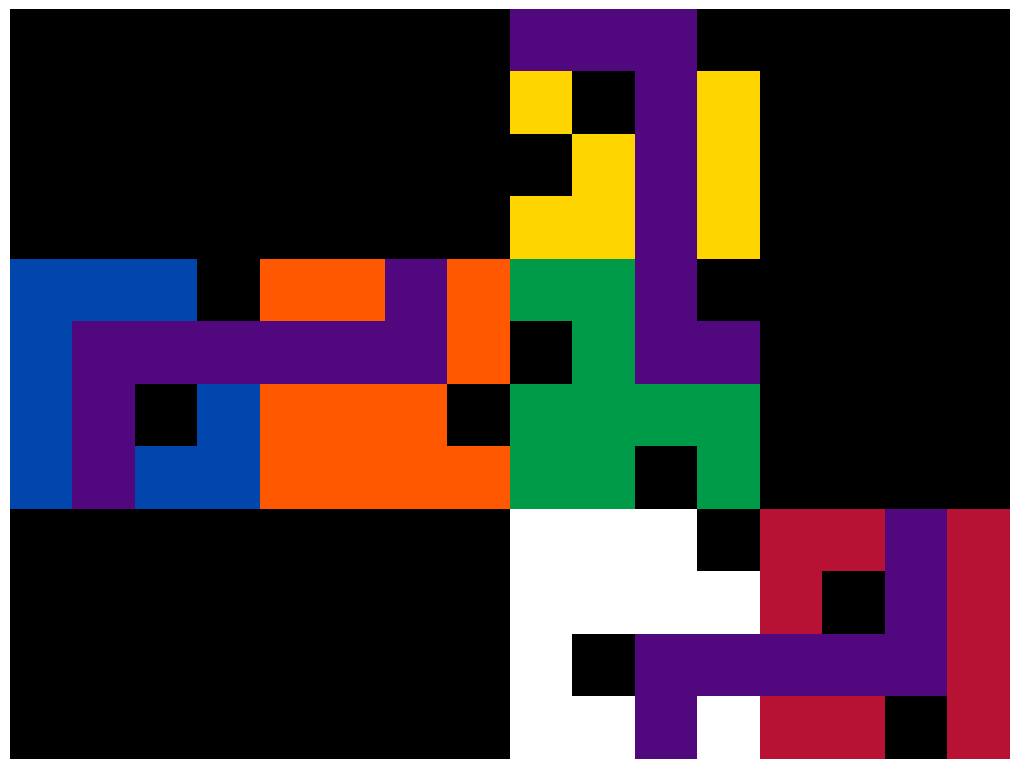

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import re

with open('input.txt', 'r') as f:
    input = f.read()
input = input.splitlines()
directions = input.pop()
input.pop()
max_width = 0
for line in input:
    if(len(line) > max_width):
        max_width = len(line)

map = []
for line in input:
    line = line.ljust(max_width, ' ')
    line = [3 if x == '.' else 1 if x == '#' else 0 for x in line]
    map.append(line)
map = np.array(map)

x_face_check = map.shape[0] // 3
y_face_check = map.shape[1] // 4
replace = 0
count = 0
position = (np.where(map[0] == 3)[0][0], 0)
# position = (100, 0)

for i, x in enumerate(map):
    for j, y in enumerate(x):
        replace = 0
        y_check = i // y_face_check
        x_check = j // x_face_check
        if(x_check == 0):
            if(y_check == 1):
                replace = 4
        elif(x_check == 1):
            if(y_check == 1):
                replace = 5
        elif(x_check == 2):
            if(y_check == 0):
                replace = 3
            elif(y_check == 1):
                replace = 6
            elif(y_check == 2):
                replace = 7
        elif(x_check == 3):
            if(y_check == 2):
                replace = 8
        if(map[i][j] != 1 and map[i][j] != 0 and replace):
            map[i][j] = replace

current_face = map[position[1]][position[0]]
map[position[1]][position[0]] = 2
directions = re.split(r"(R|L)", directions)
x_direction = 1
y_direction = 0
frames = []
frame_count = 0
faceboundsX = {
    3: [8, 11],
    4: [0, 3],
    5: [4, 7],
    6: [8, 11],
    7: [8, 11],
    8: [12, 15]
}
faceboundsY = {
    3: [0, 3],
    4: [4, 7],
    5: [4, 7],
    6: [4, 7],
    7: [8, 11],
    8: [8, 11]
}
facemap = {
    3:{
        'R': (8, 'L', False),
        'L': (5, 'D', False),
        'U': (4, 'D', True)
    },
    4:{
        'D': (7, 'U', True),
        'L': (8, 'U', True),
        'U': (3, 'D', True)
    },
    5:{
        'U': (3, 'R', False),
        'D': (7, 'R', False)
    },
    6:{
        'R': (8, 'D', True)
    },
    7:{
        'L': (5, 'U', False),
        'D': (4, 'U', True)
    },
    8:{
        'U': (6, 'L', True),
        'R': (3, 'L', True),
        'D': (4, 'R', True)
    },
}
facecheck_copy = map.copy()
f_direction = 'R'
for direction in directions:
    frame_count += 1
    if(direction == 'R' or direction == 'L'):
        frames.append(map.copy()) 
        if(direction == 'R'):
            x_direction, y_direction = -y_direction, x_direction
        else:
            x_direction, y_direction = y_direction, -x_direction
        if(x_direction == 1):
            f_direction = 'R'
        elif(y_direction == 1):
            f_direction = 'D'
        elif(x_direction == -1):
            f_direction = 'L'
        else:
            f_direction = 'U'
    else:
        for i in range(int(direction)):
            frames.append(map.copy()) 
            temp_position = (position[0] + x_direction, position[1] + y_direction)        
            try:
                if(temp_position[0] >= map.shape[1] or (f_direction == 'R' and map[temp_position[1]][temp_position[0]] == 0)):
                    face = facemap[current_face][f_direction]
                    f_direction = face[1]
                    x_pos = position[0] - faceboundsX[current_face][0]
                    if face[2]:
                        y_pos = faceboundsY[current_face][1] - position[1]
                    else:
                        y_pos = position[1] - faceboundsY[current_face][0]
                    if(f_direction == 'L'):
                        wrapX = faceboundsX[face[0]][1]
                        wrapY = faceboundsY[face[0]][0] + y_pos
                    elif f_direction == 'D':
                        wrapX = faceboundsX[face[0]][0] + y_pos
                        wrapY = faceboundsY[face[0]][0]
                    temp_position = (wrapX, wrapY)
                elif(temp_position[1] >= map.shape[0] or (f_direction == 'D' and map[temp_position[1]][temp_position[0]] == 0)):
                    face = facemap[current_face][f_direction]
                    f_direction = face[1]
                    if face[2]:
                        x_pos = faceboundsX[current_face][1] - position[0]
                    else:
                        x_pos = position[0] - faceboundsX[current_face][0]
                    y_pos = position[1] - faceboundsY[current_face][0]
                    if f_direction == 'U':
                        wrapX = faceboundsX[face[0]][0] + x_pos
                        wrapY = faceboundsY[face[0]][1]
                    elif f_direction == 'R':
                        wrapX = faceboundsX[face[0]][0]
                        wrapY = faceboundsY[face[0]][0] + x_pos
                    temp_position = (wrapX, wrapY)
                elif(temp_position[0] < 0 or (f_direction == 'L' and map[temp_position[1]][temp_position[0]] == 0)):
                    face = facemap[current_face][f_direction]
                    f_direction = face[1]
                    x_pos = position[0] - faceboundsX[current_face][0]
                    if face[2]:
                        y_pos = faceboundsY[current_face][1] - position[1]
                    else:
                        y_pos = position[1] - faceboundsY[current_face][0]
                    if f_direction == 'D':
                        wrapX = faceboundsX[face[0]][0] + y_pos
                        wrapY = faceboundsY[face[0]][0]
                    elif f_direction == 'U':
                        wrapX = faceboundsX[face[0]][0] + y_pos
                        wrapY = faceboundsY[face[0]][1]
                    temp_position = (wrapX, wrapY)
                elif(temp_position[1] < 0 or (f_direction == 'U' and map[temp_position[1]][temp_position[0]] == 0)):
                    face = facemap[current_face][f_direction]
                    f_direction = face[1]
                    if face[2]:
                        x_pos = faceboundsX[current_face][1] - position[0]
                    else:
                        x_pos = position[0] - faceboundsX[current_face][0]
                    y_pos = position[1] - faceboundsY[current_face][0]
                    if f_direction == 'D':
                        wrapX = faceboundsX[face[0]][0] + x_pos
                        wrapY = faceboundsY[face[0]][0]
                    elif f_direction == 'L':
                        wrapX = faceboundsX[face[0]][1]
                        wrapY = faceboundsY[face[0]][0] + x_pos
                    elif f_direction == 'R':
                        wrapX = faceboundsX[face[0]][0]
                        wrapY = faceboundsY[face[0]][0] + x_pos
                    temp_position = (wrapX, wrapY)
                if(map[temp_position[1]][temp_position[0]] == 1):
                    break
                if(f_direction == 'R'):
                    x_direction = 1
                    y_direction = 0
                elif(f_direction == 'D'):
                    x_direction = 0
                    y_direction = 1
                elif(f_direction == 'L'):
                    x_direction = -1
                    y_direction = 0
                else:
                    x_direction = 0
                    y_direction = -1
                position = temp_position
                if(facecheck_copy[position[1]][position[0]] in facemap.keys()):
                    current_face = facecheck_copy[position[1]][position[0]]
                map[position[1]][position[0]] = 2
                
            except Exception as e:
                print(e)
                # print(position, temp_position, map.shape, f_direction, face, x_pos, y_pos, wrapX, wrapY, current_face, faceboundsY)
                break
if(x_direction == 1):
    f_direction = 'R'
elif(y_direction == 1):
    f_direction = 'D'
elif(x_direction == -1):
    f_direction = 'L'
else:
    f_direction = 'U'
frames.append(map.copy())
directions = ['R', 'D', 'L', 'U']
final_score = (position[1] + 1) * 1000 + (position[0] + 1) * 4 + directions.index(f_direction)
animate_fast('output_two', frames, 10)
print(final_score)
